In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.available
plots.style.use("fivethirtyeight")

## Create a new table for $icecream$

In [2]:
icecream = Table().with_columns("Flavor", make_array("Chocolate", "Strawberry", "Vanilla"),
                             "Number of Cartons", make_array(16, 5, 9))

In [3]:
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


## Bar chart

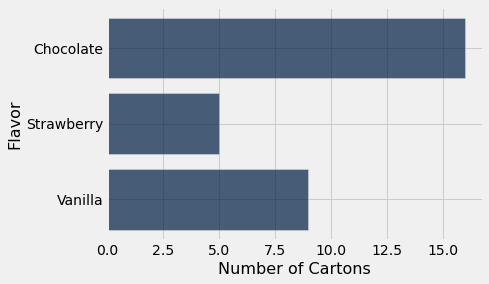

In [4]:
icecream.barh("Flavor", "Number of Cartons")

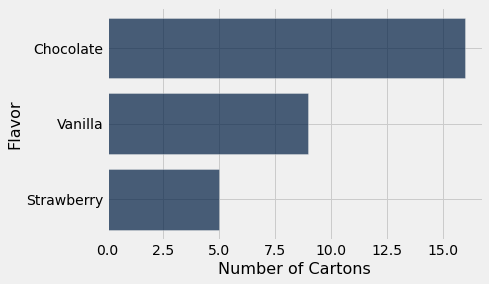

In [5]:
icecream.sort(1, descending=True).barh("Flavor")

## Grouping Categorical Data

In [6]:
top = Table.read_table('../assets/top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [7]:
studio_distribution = top.group(1)
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


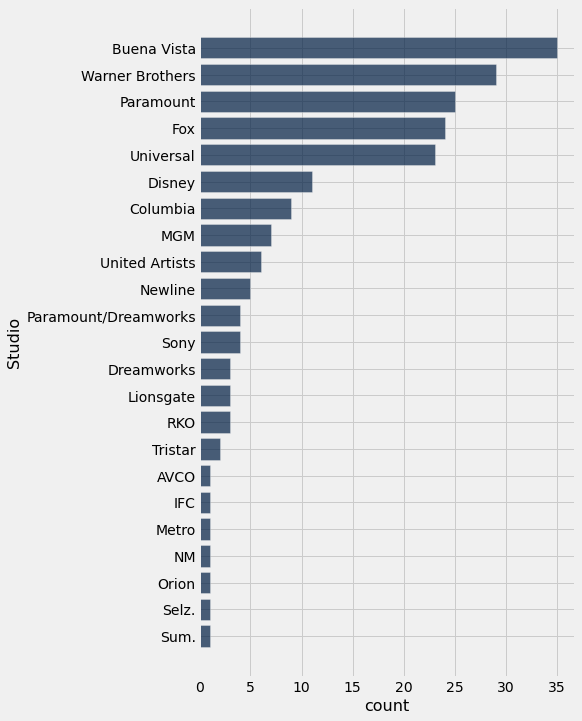

In [8]:
studio_distribution.sort(1, descending=True).barh("Studio")

In [9]:
top.set_format([2,3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [10]:
millions = top.select("Title", "Gross (Adjusted)")
millions.relabel("Gross (Adjusted)", "Adjusted Gross")
approx = np.round(millions.column(1)/1e6, 2)
millions = millions.drop(1).with_columns("Adjust Gross", approx)
millions

Title,Adjust Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


In [11]:
adj_gross = millions.column("Adjust Gross")
min(adj_gross), max(adj_gross)

(338.41000000000003, 1796.1800000000001)

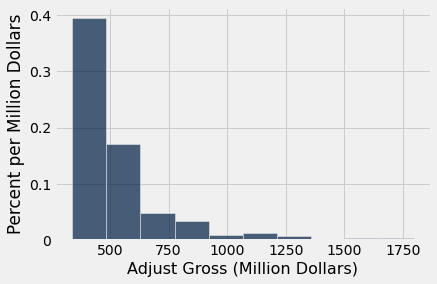

In [12]:
millions.hist("Adjust Gross", unit="Million Dollars")

In [13]:
millions.sort('Adjust Gross').show()

Title,Adjust Gross
Who Framed Roger Rabbit,338.41
Suicide Squad,339.41
The Firm,340.03
Batman v Superman: Dawn of Justice,340.14
9 to 5,341.36
"What's Up, Doc?",345.14
The Twilight Saga: New Moon,345.91
Superman II,345.96
Signs,348.79
Batman Returns,348.81


In [14]:
bin_counts = millions.bin("Adjust Gross", bins = np.arange(300, 2001, 100))
bin_counts.sort('bin', descending=True).show()

bin,Adjust Gross count
2000,0
1900,0
1800,0
1700,1
1600,0
1500,1
1400,0
1300,0
1200,3
1100,3


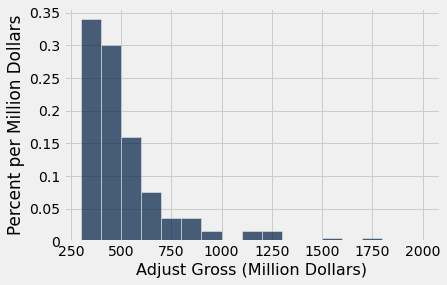

In [15]:
millions.hist('Adjust Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

> but we found that the bar height is not that kind of clear to see,
> the gap bwtween the topest and the lowest is far to large

## Area Principle and Gerneral Principles to help bin charts more suitable to see

- The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical and therefore have fixed positions on the number line.

- The area of each bar is proportional to the number of entries in the bin.

$area \ of \ bar = percent \ of \ entries \ in \ bin \\$ 
$area \ of \ bar = height\ of \ bar  \times \ width \ of \ bin\ \\ $

$ height \ of \ bar = \frac{area \ of \ bar}{width \ of \ bin} = \frac{percent \ of \ entries \ in \ bin}{width \ of \ bin\}$

$-change\ begin$

In [16]:
bin_counts.show(3)

bin,Adjust Gross count
300,68
400,60
500,32


[300, 400) bin contains 68,
$p = \frac{68}{200} = 34%$

the width of the [300, 400) bin is 400-300 = 100.
So:
$Height = \frac{34}{100} = 0.34$

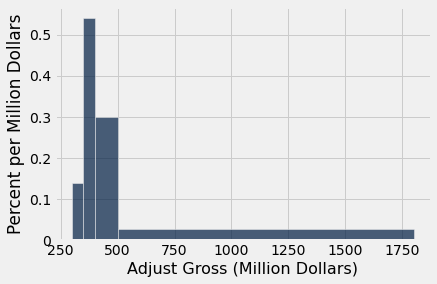

In [17]:
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist("Adjust Gross", bins = uneven, unit="Million Dollars")

In [18]:
millions.bin("Adjust Gross", bins=uneven)

bin,Adjust Gross count
300,14
350,54
400,60
500,72
1800,0


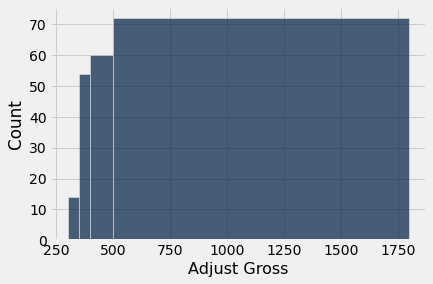

In [19]:
millions.hist('Adjust Gross', bins=uneven, normed=False)

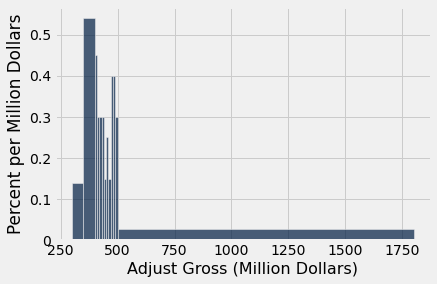

In [20]:
some_tiny_bins = make_array(
    300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjust Gross', bins=some_tiny_bins, unit='Million Dollars')

In [21]:
histogram_elements = millions.bin("Adjust Gross", bins=uneven).relabeled(1, 'count')
histogram_elements

bin,count
300,14
350,54
400,60
500,72
1800,0


In [22]:
total_count = sum(histogram_elements.column(1))
total_count

200

In [23]:
percents = np.round(histogram_elements.column("count")/total_count*100, 2)
percents

array([  7.,  27.,  30.,  36.,   0.])

In [31]:
histogram_elements = histogram_elements.with_columns("percent", percents)
histogram_elements

bin,count,percent
300,14,7
350,54,27
400,60,30
500,72,36
1800,0,0


In [32]:
histogram_elements.num_rows

5

In [34]:
bin_widths = np.diff(histogram_elements.column("bin"))
# histogram_elements.with_columns("")
# histogram_elements = histogram_elements.take(np.arange(4))
# histogram_elements.with_columns("width", bin_widths)
histogram_elements = histogram_elements.take(np.arange(4)).with_columns("width", bin_widths)
histogram_elements

bin,count,percent,width
300,14,7,50
350,54,27,50
400,60,30,100
500,72,36,1300


In [36]:
heights = np.round(histogram_elements.column("percent")/histogram_elements.column("width"), 2)
heights

array([ 0.14,  0.54,  0.3 ,  0.03])

In [39]:
histogram_elements = histogram_elements.with_columns("heights", heights)
histogram_elements

bin,count,percent,width,heights
300,14,7,50,0.14
350,54,27,50,0.54
400,60,30,100,0.3
500,72,36,1300,0.03


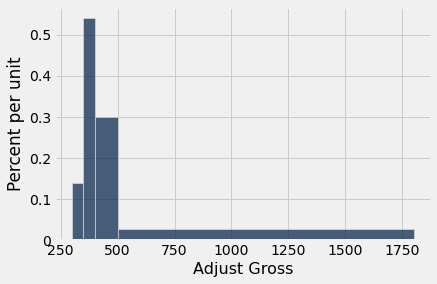

In [40]:
millions.hist("Adjust Gross", bins=uneven)